# [Python Reference Link](http://www.data8.org/sp20/python-reference.html)
*Run the cell below so that we can set our modules up*# Importing our modules

In [1]:
import numpy as np
from datascience import *
import math as m

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
birds = Table.read_table('snowy_plover.csv')
birds

Egg Length,Egg Breadth,Egg Weight,Bird Weight
28.8,21.84,7.4,5.2
29.04,22.45,7.7,5.4
29.36,22.48,7.9,5.6
30.1,21.71,7.5,5.3
30.17,22.75,8.3,5.9
30.34,22.84,8.5,5.8
30.36,22.5,8.2,5.8
30.46,22.72,8.3,6
30.54,23.31,9,6.1
30.62,22.94,8.5,6.2


# The Residual & The Root Mean Square Error

In [3]:
# Let's run this cell 

def x_y_estimate_residual(table,x_col,y_col):
    x_array = birds.column(x_col)
    y_array = birds.column(y_col)

    x_mean = np.mean(x_array)
    x_std = np.std(x_array)

    y_mean = np.mean(y_array)
    y_std = np.std(y_array)

    x_su = (x_array - x_mean)/x_std
    y_su = (y_array - y_mean)/y_std

    r_value = np.mean(x_su*y_su)
    slope = r_value*(y_std/x_std)
    intercept = y_mean - slope * x_mean
    
    estimate = slope*x_array + intercept
    
    output_table = table.select(x_col,y_col).with_columns('Estimate',estimate,
                                                          'Residual',y_array - estimate)
    print(slope,intercept)
    
    return output_table

def lin_reg_slope_intercept(table,x_col,y_col):
    x_array = birds.column(x_col)
    y_array = birds.column(y_col)

    x_mean = np.mean(x_array)
    x_std = np.std(x_array)

    y_mean = np.mean(y_array)
    y_std = np.std(y_array)

    x_su = (x_array - x_mean)/x_std
    y_su = (y_array - y_mean)/y_std

    r_value = np.mean(x_su*y_su)
    slope = r_value*(y_std/x_std)
    intercept = y_mean - slope * x_mean
    
    return make_array(slope,intercept)

x_y_estimate_residual(birds,'Egg Weight','Bird Weight')

0.718515344894 -0.0582722619343


Egg Weight,Bird Weight,Estimate,Residual
7.4,5.2,5.25874,-0.0587413
7.7,5.4,5.4743,-0.0742959
7.9,5.6,5.618,-0.017999
7.5,5.3,5.33059,-0.0305928
8.3,5.9,5.90541,-0.0054051
8.5,5.8,6.04911,-0.249108
8.2,5.8,5.83355,-0.0335536
8.3,6,5.90541,0.0945949
9,6.1,6.40837,-0.308366
8.5,6.2,6.04911,0.150892


In [5]:
residual = x_y_estimate_residual(birds,'Egg Weight','Bird Weight').column('Residual')
residual

0.718515344894 -0.0582722619343


array([-0.05874129, -0.07429589, -0.01799896, -0.03059282, -0.0054051 ,
       -0.24910817, -0.03355357,  0.0945949 , -0.30836584,  0.15089183,
        0.3790403 , -0.13355357,  0.2945949 ,  0.20718876,  0.15089183,
        0.12274336,  0.25089183, -0.03651431,  0.01978262, -0.33651431,
       -0.5209597 ,  0.15089183,  0.03533723, -0.1054051 , -0.13355357,
        0.16644643,  0.06348569, -0.14910817,  0.13533723,  0.0790403 ,
        0.61978262,  0.09163416, -0.53651431, -0.15206891, -0.08021738,
       -0.0209597 , -0.06466277,  0.31978262, -0.25206891, -0.15206891,
        0.06348569,  0.11978262,  0.04497035, -0.10836584])

In [6]:
birds_with_residual = birds.with_columns('Residual',residual)
birds_with_residual

Egg Length,Egg Breadth,Egg Weight,Bird Weight,Residual
28.8,21.84,7.4,5.2,-0.0587413
29.04,22.45,7.7,5.4,-0.0742959
29.36,22.48,7.9,5.6,-0.017999
30.1,21.71,7.5,5.3,-0.0305928
30.17,22.75,8.3,5.9,-0.0054051
30.34,22.84,8.5,5.8,-0.249108
30.36,22.5,8.2,5.8,-0.0335536
30.46,22.72,8.3,6,0.0945949
30.54,23.31,9,6.1,-0.308366
30.62,22.94,8.5,6.2,0.150892


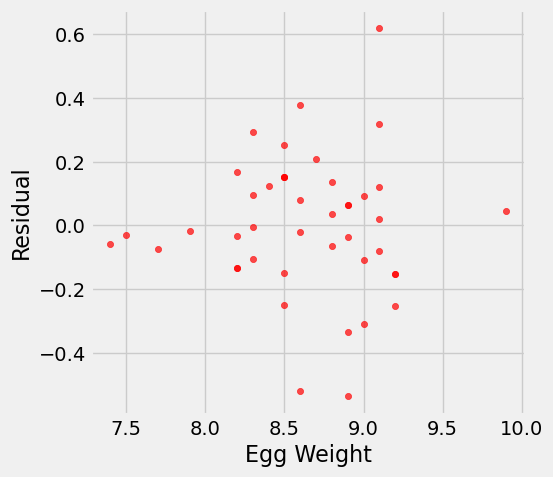

In [7]:
birds_with_residual.scatter('Egg Weight','Residual',color = 'r')

In [8]:
error = residual
error

array([-0.05874129, -0.07429589, -0.01799896, -0.03059282, -0.0054051 ,
       -0.24910817, -0.03355357,  0.0945949 , -0.30836584,  0.15089183,
        0.3790403 , -0.13355357,  0.2945949 ,  0.20718876,  0.15089183,
        0.12274336,  0.25089183, -0.03651431,  0.01978262, -0.33651431,
       -0.5209597 ,  0.15089183,  0.03533723, -0.1054051 , -0.13355357,
        0.16644643,  0.06348569, -0.14910817,  0.13533723,  0.0790403 ,
        0.61978262,  0.09163416, -0.53651431, -0.15206891, -0.08021738,
       -0.0209597 , -0.06466277,  0.31978262, -0.25206891, -0.15206891,
        0.06348569,  0.11978262,  0.04497035, -0.10836584])

In [9]:
square = error**2
square

array([  3.45053918e-03,   5.51987983e-03,   3.23962659e-04,
         9.35920927e-04,   2.92151134e-05,   6.20548802e-02,
         1.12584180e-03,   8.94819498e-03,   9.50894926e-02,
         2.27683445e-02,   1.43671546e-01,   1.78365550e-02,
         8.67861547e-02,   4.29271828e-02,   2.27683445e-02,
         1.50659336e-02,   6.29467105e-02,   1.33329466e-03,
         3.91352189e-04,   1.13241879e-01,   2.71399013e-01,
         2.27683445e-02,   1.24871960e-03,   1.11102353e-02,
         1.78365550e-02,   2.77044153e-02,   4.03043314e-03,
         2.22332463e-02,   1.83161650e-02,   6.24736837e-03,
         3.84130500e-01,   8.39681889e-03,   2.87847602e-01,
         2.31249537e-02,   6.43482751e-03,   4.39309198e-04,
         4.18127423e-03,   1.02260926e-01,   6.35387359e-02,
         2.31249537e-02,   4.03043314e-03,   1.43478769e-02,
         2.02233215e-03,   1.17431557e-02])

In [10]:
mean = np.mean(square)
mean

0.04649394137555684

In [11]:
root = m.sqrt(mean)
root

0.21562453797181072

In [12]:
#let's put it all together in a one-line calculation
root_mean_square_error = m.sqrt(np.mean(error**2))
root_mean_square_error

0.21562453797181072

### Let's define the function `rmse` to calculate the root mean square error

Given any proposed slope & intercept, it will calculate the root mean square error of the estimated column of 'Bird Weights' corresponding to the column of 'Egg Weights'

In [18]:
def rmse(slope,intercept):
    x_array = birds.column('Egg Weight')
    y_array = birds.column('Bird Weight')
    
    prediction = slope*x_array + intercept
    prediction_error = y_array - prediction
    
    return np.sqrt(np.mean(prediction_error**2))

In [19]:
m_b_array = lin_reg_slope_intercept(birds,'Egg Weight','Bird Weight')
m_slope = m_b_array.item(0)
b_intercept = m_b_array.item(1)
print(m_slope,b_intercept)

0.7185153448936793 -0.05827226193428814


In [22]:
rmse(m_slope,b_intercept)

0.21562453797181072

In [20]:
slopes = make_array()
intercepts = make_array()
these_rmse = make_array()

for m in np.arange(0,2,0.1):
    for b in np.arange(-1,1,0.1):
        this_rmse = rmse(m,b)
        
        slopes = np.append(slopes,m)
        intercepts = np.append(intercepts,b)
        these_rmse = np.append(these_rmse,this_rmse)

slope_intercept_residual_table = Table().with_columns('Slopes (m)',slopes,
                                    'Intercepts (b)', intercepts,
                                    'RMSE',these_rmse)
slope_intercept_residual_table.show()

Slopes (m),Intercepts (b),RMSE
0,-1,7.15697
0,-0.9,7.05714
0,-0.8,6.9573
0,-0.7,6.85748
0,-0.6,6.75766
0,-0.5,6.65784
0,-0.4,6.55803
0,-0.3,6.45822
0,-0.2,6.35842
0,-0.1,6.25863


In [21]:
slope_intercept_residual_table.sort('RMSE')

Slopes (m),Intercepts (b),RMSE
0.7,0.1,0.215812
0.8,-0.8,0.222425
0.8,-0.7,0.227676
0.6,0.9,0.232242
0.7,0.2,0.237185
0.7,-2.22045e-16,0.238523
0.8,-0.9,0.259054
0.8,-0.6,0.272397
0.6,0.8,0.277374
0.7,0.3,0.293153


# The `minimize` function and Optimization

In [23]:
minimize(rmse)

array([ 0.71398551, -0.01916128])

In [24]:
print(m_slope,b_intercept)

0.7185153448936793 -0.05827226193428814
